# Classification de voyelles par lois gaussiennes


### Vérification des données


In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [10]:
#1- Charger les données d'apprentissage avec le code suivant :
f = open('APP.pkl', 'rb')
dicoAPP = pickle.load(f)
app_aa = dicoAPP["aa"]
app_ii = dicoAPP["ii"]
app_uu = dicoAPP["uu"]
f.close()

# Vérifier le contenu et la taille des matrices
print("Taille de la matrice app_aa :", app_aa.shape)
print("Un aperçu de la matrice app_aa :\n", app_aa[:5])

print("Taille de la matrice app_ii :", app_ii.shape)
print("Un aperçu de la matrice app_ii :\n", app_ii[:5])

print("Taille de la matrice app_uu :", app_uu.shape)
print("Un aperçu de la matrice app_uu :\n", app_uu[:5])
# Il s'agit de matrices 80x2 résultant d'une ACP sur une paramétrisation cepstrale

Taille de la matrice app_aa : (80, 2)
Un aperçu de la matrice app_aa :
 [[ 27.94649426 193.26043937]
 [ 23.14986615 114.84922022]
 [ 23.00731261 100.39365379]
 [  1.45004927 155.53746105]
 [ 14.50312045 122.1000212 ]]
Taille de la matrice app_ii : (80, 2)
Un aperçu de la matrice app_ii :
 [[-17.53533632 -10.80783246]
 [-17.19142101 -10.31742005]
 [ -9.62614275 -14.4389219 ]
 [-12.58679693 -19.41093916]
 [-12.91658689 -22.5159097 ]]
Taille de la matrice app_uu : (80, 2)
Un aperçu de la matrice app_uu :
 [[ 43.822864   -16.40654854]
 [ 39.63215773 -16.89754753]
 [ 34.82754343 -17.14362431]
 [ 34.19962059 -26.50298719]
 [ 32.97223579 -31.18801612]]


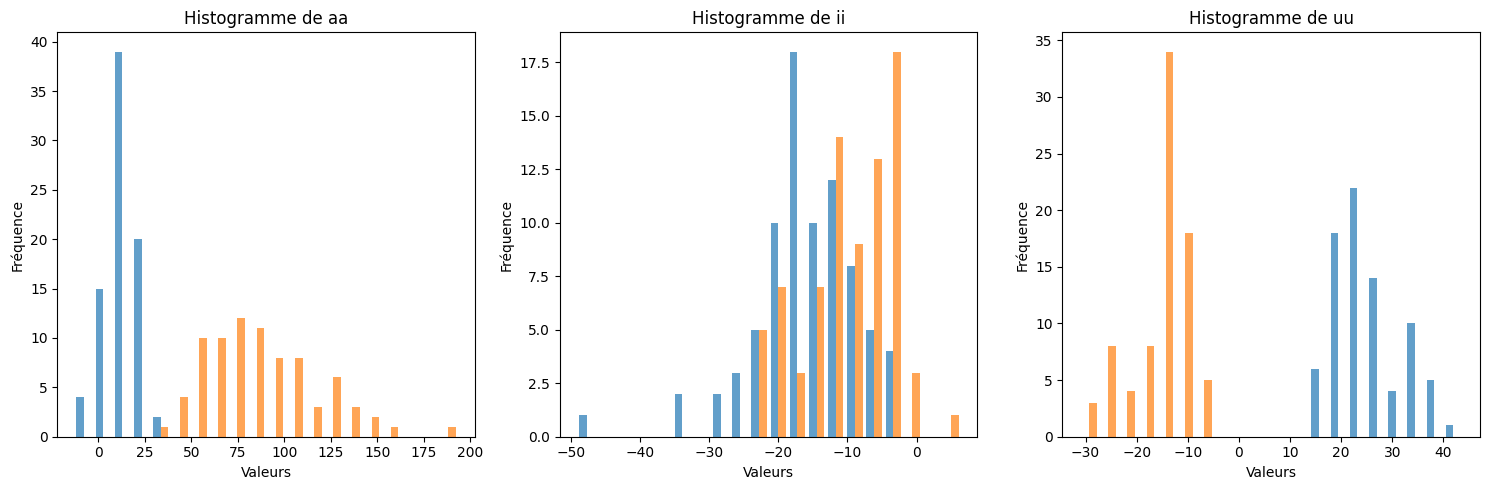

In [11]:
# 2- Afficher sur une seule figure, en utilisant subplot(nb_lignes, nb_colonnes, numero_trace),
# l'histogramme de chacune des classes : aa, uu et ii.
# Afficher les histogrammes pour aa, ii et uu sur une seule figure
fig = plt.figure(figsize=(15, 5))  # Taille de la figure

# Histogramme de la classe 'aa'
plt.subplot(1, 3, 1)  # 1 ligne, 3 colonnes, 1ère trace
plt.hist(app_aa, bins=20, alpha=0.7)
plt.title('Histogramme de aa')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')

# Histogramme de la classe 'ii'
plt.subplot(1, 3, 2)  # 1 ligne, 3 colonnes, 2e trace
plt.hist(app_ii, bins=20, alpha=0.7)
plt.title('Histogramme de ii')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')

# Histogramme de la classe 'uu'
plt.subplot(1, 3, 3)  # 1 ligne, 3 colonnes, 3e trace
plt.hist(app_uu, bins=20, alpha=0.7)
plt.title('Histogramme de uu')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')

# Afficher la figure
plt.tight_layout()  # Ajuster les sous-traces pour qu'elles ne se chevauchent pas
plt.show()


### Utilisation de lois gaussiennes

In [32]:
#3- APPRENTISSAGE : estimer les paramètres (moyenne et matrice de covariance) de chaque classe
# Quelles sont les dimensions des variables crées ; que contiennent-elles ?
# Estimer la moyenne et la matrice de covariance pour la classe 'aa'

#Chaque matrice de covariance est de dimension 2×2, contenant la variance des deux variables sur la diagonale et leur covariance en dehors de la diagonale.

moyenne_aa = np.mean(app_aa, axis=0)  # Moyenne sur les lignes
cov_aa = np.cov(app_aa, rowvar=False)  # Matrice de covariance

# Estimer la moyenne et la matrice de covariance pour la classe 'ii'
moyenne_ii = np.mean(app_ii, axis=0)
cov_ii = np.cov(app_ii, rowvar=False)

# Estimer la moyenne et la matrice de covariance pour la classe 'uu'
moyenne_uu = np.mean(app_uu, axis=0)
cov_uu = np.cov(app_uu, rowvar=False)

list_moy = [moyenne_aa, moyenne_ii, moyenne_uu]
list_cov = [cov_aa, cov_ii, cov_uu]

# Afficher les résultats
print("Moyenne de la classe aa:", moyenne_aa)
print("Matrice de covariance de la classe aa:\n", cov_aa)

print("\nMoyenne de la classe ii:", moyenne_ii)
print("Matrice de covariance de la classe ii:\n", cov_ii)

print("\nMoyenne de la classe uu:", moyenne_uu)
print("Matrice de covariance de la classe uu:\n", cov_uu)

Moyenne de la classe aa: [12.73410809 86.9221835 ]
Matrice de covariance de la classe aa:
 [[ 73.95541499 -74.69081838]
 [-74.69081838 912.23345829]]

Moyenne de la classe ii: [-15.84258271  -9.71847791]
Matrice de covariance de la classe ii:
 [[ 57.07718836 -30.90012588]
 [-30.90012588  42.72735791]]

Moyenne de la classe uu: [ 25.36460256 -15.63309221]
Matrice de covariance de la classe uu:
 [[ 45.53917015 -27.27292986]
 [-27.27292986  31.08463331]]


In [41]:
#4- RECONNAISSANCE : écrire une fonction "classer" qui renvoie la classe obtenue
# par maximum de vraisemblance sur les lois gaussiennes estimées (modèle de chaque classe)
# sur l'observation fournie en entrée :
def vraissemblance(obs, m, c):
  d = len(obs)  # La dimension de l'observation (nombre de caractéristiques)

  # Calculer l'inverse de la matrice de covariance
  inv_c = np.linalg.inv(c)

  # Calculer le déterminant de la matrice de covariance
  det_c = np.linalg.det(c)

  # Calculer la différence entre l'observation et la moyenne
  diff = obs - m

  # Calculer l'exposant de la formule
  exposant = -0.5 * diff.T @ inv_c @ diff

  # Calculer la vraisemblance
  vraisemblance = (1 / ((2 * np.pi)**(d/2) * np.sqrt(det_c))) * np.exp(exposant)

  return vraisemblance

# Fonction de classification
def classer(obs, list_moy, list_cov):
  vraisemblance = []
  for i in range(len(list_moy)):
    vraisemblance.append(vraissemblance(obs, list_moy[i], list_cov[i]))

  return   vraisemblance.index(max(vraisemblance))

# Exemple de résultat :
classer(app_aa[0,:], list_moy, list_cov)
# => no_classe = 0

0

In [34]:
#5- Des observations à tester sont présentes dans le fichier Pickle suivant : TST.pkl
# Charger ces données de tests comme  pour les données d'apprentissage)
# Vérifier leur dimensions et leur contenu
f = open('TST.pkl', 'rb')
dicoTST = pickle.load(f)
tst_aa = dicoTST["aa"]
tst_ii = dicoTST["ii"]
tst_uu = dicoTST["uu"]
f.close()

print("Taille de la matrice tst_aa :", tst_aa.shape)
print("Un aperçu de la matrice tst_aa :\n", tst_aa[:5])

print("Taille de la matrice tst_ii :", tst_ii.shape)
print("Un aperçu de la matrice tst_ii :\n", tst_ii[:5])

print("Taille de la matrice tst_uu :", tst_uu.shape)
print("Un aperçu de la matrice tst_uu :\n", tst_uu[:5])

Taille de la matrice tst_aa : (20, 2)
Un aperçu de la matrice tst_aa :
 [[11.77415839 54.17821404]
 [15.01573001 41.00905922]
 [ 3.76834603 60.42549292]
 [ 8.61862641 66.33990703]
 [11.98697752 43.57924851]]
Taille de la matrice tst_ii : (20, 2)
Un aperçu de la matrice tst_ii :
 [[-14.74319453  -5.37396239]
 [ -9.65790036  -4.12177997]
 [-31.47080885   1.28556579]
 [-20.5725793   -5.57666566]
 [-13.06637184  -4.41913793]]
Taille de la matrice tst_uu : (20, 2)
Un aperçu de la matrice tst_uu :
 [[ 20.69086459 -10.74042558]
 [ 18.33295967  -9.25915595]
 [ 26.5921063  -12.80668524]
 [ 20.12523702 -10.47151906]
 [ 19.45505737 -10.80174397]]


In [42]:
#6- Définir la fonction tout_tester qui effectue tous les tests de classification
def tout_tester(list_tst, list_moy, list_cov):

  resultats = []

  for i in range(len(list_tst)):
    for obs in list_tst[i]:
      resultats.append(classer(obs, list_moy, list_cov))

  return resultats


Taux de Bonne Reconnaissance: 1.0


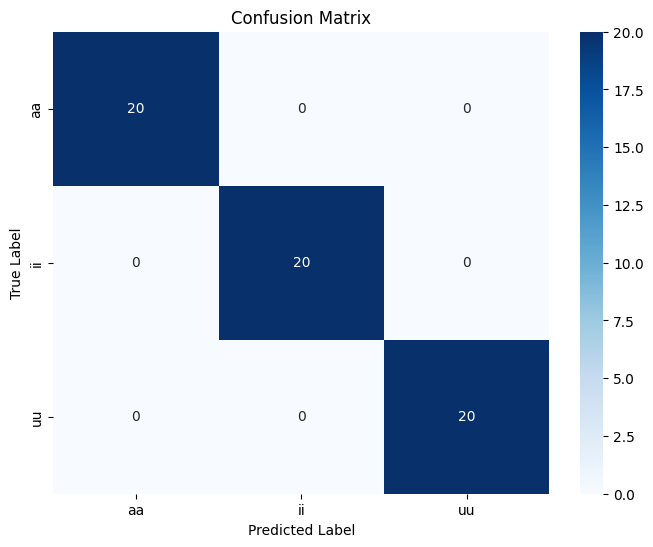

In [43]:
#7- Réaliser les tests et afficher la matrice de confusion et le taux de bonne reconnaisance correspondant
# Perform the classification tests
list_tst = [tst_aa, tst_ii, tst_uu]
# list_moy = [moyenne_aa, moyenne_ii, moyenne_uu]
# list_cov = [cov_aa, cov_ii, cov_uu]

resultats = tout_tester(list_tst, list_moy, list_cov)

# resultats = tout_tester(tst_aa, tst_ii, tst_uu, moyenne_aa, cov_aa, moyenne_uu, cov_uu, moyenne_ii, cov_ii)

# Create the true labels for comparison
true_labels = [0] * len(tst_aa) + [1] * len(tst_ii) + [2] * len(tst_uu)

# Calculate the confusion matrix
matrice_confusion = confusion_matrix(true_labels, resultats)

# Calculate the accuracy
taux_bonne_reconnaissance = accuracy_score(true_labels, resultats)

# Display the results
print("\nTaux de Bonne Reconnaissance:", taux_bonne_reconnaissance)

plt.figure(figsize=(8, 6))
sns.heatmap(matrice_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=['aa', 'ii', 'uu'], yticklabels=['aa', 'ii', 'uu'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Visualisation  des résultats

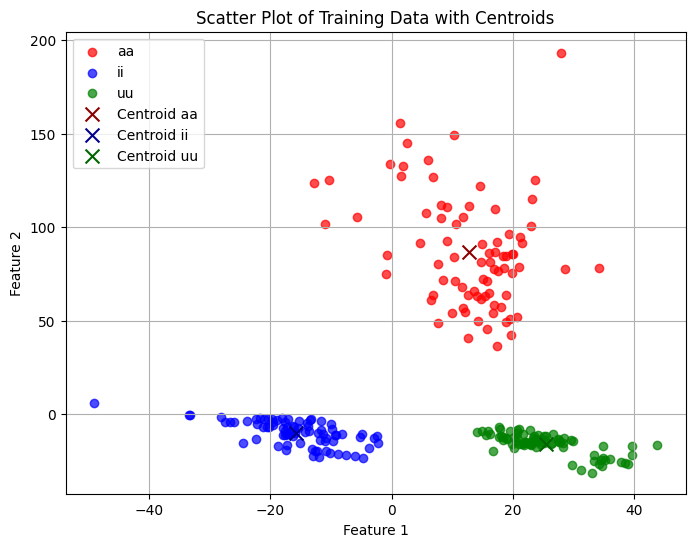

In [44]:
#9- Représenter en 2D et par des couleurs différentes les nuages de points correspondant
# aux données d'apprentissage
plt.figure(figsize=(8, 6))
plt.scatter(app_aa[:, 0], app_aa[:, 1], color='red', label='aa', alpha=0.7)
plt.scatter(app_ii[:, 0], app_ii[:, 1], color='blue', label='ii', alpha=0.7)
plt.scatter(app_uu[:, 0], app_uu[:, 1], color='green', label='uu', alpha=0.7)

#10- Afficher les centroïdes des différentes classes
plt.scatter(moyenne_aa[0], moyenne_aa[1], color='darkred', marker='x', s=100, label='Centroid aa')
plt.scatter(moyenne_ii[0], moyenne_ii[1], color='darkblue', marker='x', s=100, label='Centroid ii')
plt.scatter(moyenne_uu[0], moyenne_uu[1], color='darkgreen', marker='x', s=100, label='Centroid uu')

plt.title('Scatter Plot of Training Data with Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-21-4dd2e2ae9a64>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('viridis', 3) # 3 for 3 classes


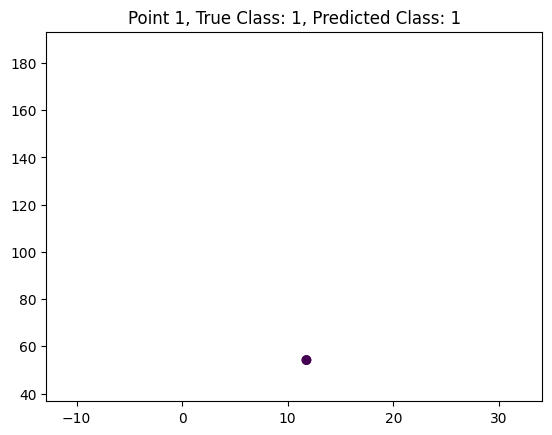

In [21]:
#11- Réaliser une animation pour l'affichage des points de test (un par un avec des couleurs par exemple...)
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from matplotlib import cm  # Import colormap module

# Assuming you have the test data points in tst_aa, tst_ii, tst_uu
# and the classification function classer() defined

# Concatenate all test points and create corresponding labels
all_test_points = np.concatenate([tst_aa, tst_ii, tst_uu])
labels = [1] * len(tst_aa) + [3] * len(tst_ii) + [2] * len(tst_uu)

# Create a color map for the classes
#colors = {1: 'red', 2: 'green', 3: 'blue'}

# Create a colormap object (e.g., 'viridis')
colormap = cm.get_cmap('viridis', 3) # 3 for 3 classes

# Create the figure and axes
fig, ax = plt.subplots()
scatter = ax.scatter([], [], c=[], cmap='viridis')

# Set plot limits based on training data
ax.set_xlim(np.min(app_aa[:, 0]), np.max(app_aa[:, 0]))
ax.set_ylim(np.min(app_aa[:, 1]), np.max(app_aa[:, 1]))

# Animation update function
def update(frame):
    x = all_test_points[frame, 0]
    y = all_test_points[frame, 1]

    # Map class label to colormap index (0, 1, or 2)
    color_index = labels[frame] - 1

    # Get the color from the colormap using the index
    color = colormap(color_index)

    scatter.set_offsets(np.append(scatter.get_offsets(), [[x, y]], axis=0))
    scatter.set_array(np.append(scatter.get_array(), color_index)) # Use color index

    # Optionally, display the predicted class
    predicted_class = classer(all_test_points[frame], moyenne_aa, cov_aa, moyenne_uu, cov_uu, moyenne_ii, cov_ii)
    ax.set_title(f"Point {frame + 1}, True Class: {labels[frame]}, Predicted Class: {predicted_class}")

    return scatter,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(all_test_points), interval=200, blit=True)
